* Supervised Machine Learning : X , y (output /target)
* Unsupervised Learning: no target/output ,The algorithm finds patterns by itself.
* We used unsupervised learning to group similar data


 **K-means Clustring**
 * Cluster: We will partition our dataset into K distinct group  (cluster)
 * Centroid: nearest mean cluster

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram,linkage

In [ ]:
df=pd.DataFrame({
                'Entry_time':[9,10,11,14,15,16,17],   #start browsing the website
                 'Duration':[30,45,40,90,80,85,100]    #staty on website
})

In [ ]:
df.shape

(7, 2)

In [ ]:
df.head()

,Entry_time,Duration
0,9,30
1,10,45
2,11,40
3,14,90
4,15,80


In [ ]:
#model Creation
model_kmeans=KMeans(n_clusters=2,random_state=42)


In [ ]:
df['cluster']=model_kmeans.fit_predict(df[['Entry_time','Duration']])

In [ ]:
centriod=model_kmeans.cluster_centers_

In [ ]:
print(df['cluster'])

0    0
1    0
2    0
3    1
4    1
5    1
6    1
Name: cluster, dtype: int32


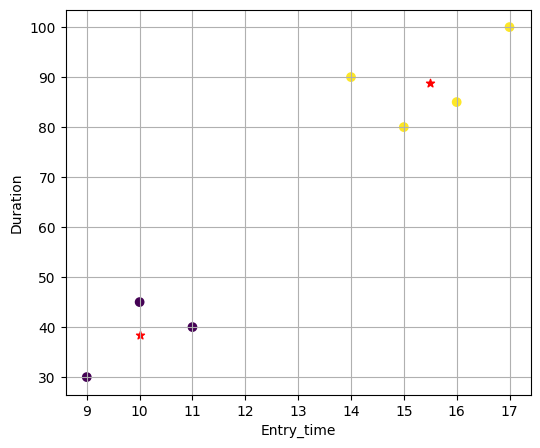

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df['Entry_time'],df['Duration'],c=df['cluster'])
plt.scatter(centriod[:,0],centriod[:,1],marker='*',c='red')
plt.xlabel('Entry_time')
plt.ylabel('Duration')
plt.grid()
plt.show()



In [ ]:
df=pd.read_csv('/content/sample_data/customers.csv')

In [ ]:
df.head()

,CustomerID,AnnualIncome,SpendingScore
0,1,15,79
1,2,16,81
2,3,17,76
3,4,18,75
4,5,19,73


In [ ]:
df.shape

(20, 3)

In [ ]:
X=df[['AnnualIncome','SpendingScore']]  #finding features

In [ ]:
model=KMeans(n_clusters=5,random_state=42)  #creating model

In [ ]:
df['Cluster']=model.fit_predict(X)  #fit the model and assign cluster label

In [ ]:
print(df[['AnnualIncome','SpendingScore','Cluster']])

    AnnualIncome  SpendingScore  Cluster
0             15             79        2
1             16             81        2
2             17             76        2
3             18             75        2
4             19             73        2
5             20             72        2
6             25             40        0
7             28             42        0
8             30             39        0
9             33             35        0
10            36             30        0
11            40             65        4
12            42             66        4
13            48             62        4
14            52             20        3
15            60             18        3
16            62             15        3
17            65             85        1
18            68             88        1
19            70             90        1


In [ ]:
centriod=model.cluster_centers_

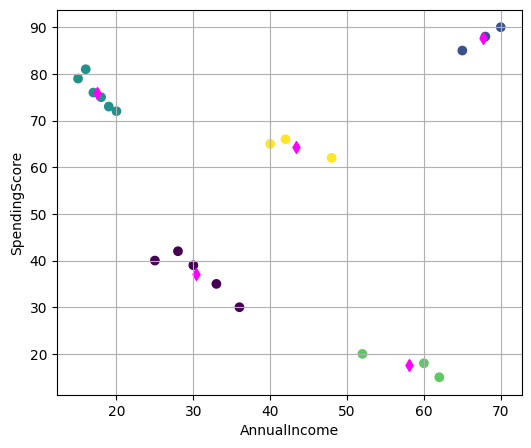

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df['AnnualIncome'],df['SpendingScore'],c=df['Cluster'])
plt.scatter(centriod[:,0],centriod[:,1],marker='d',c='magenta')
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.grid()
plt.show()

### Hierarchical Clustering
* Build a tree like hierarchical structure
* No nee to choose the cluster initially


In [ ]:
#montly_spend ,visit_per_month
data={
    'customer_1':[500,3],
    'customer_2':[520,4],
    'customer_3':[480,2],
    'customer_4':[1500,8],
    'customer_5':[1600,9],
    'customer_6':[1800,10],
    'customer_7':[1550,6]

}

In [ ]:
df=pd.DataFrame(data)
df.head()

,customer_1,customer_2,customer_3,customer_4,customer_5,customer_6,customer_7
0,500,520,480,1500,1600,1800,1550
1,3,4,2,8,9,10,6


In [ ]:
df=pd.DataFrame(data).T

In [ ]:
df.head()

,0,1
customer_1,500,3
customer_2,520,4
customer_3,480,2
customer_4,1500,8
customer_5,1600,9


In [ ]:
df.rename(columns={0:'montly_spend',1:'visit_per_month'},inplace=True)

In [ ]:
df.head()

,montly_spend,visit_per_month
customer_1,500,3
customer_2,520,4
customer_3,480,2
customer_4,1500,8
customer_5,1600,9


In [ ]:
linked=linkage(df,method='ward')

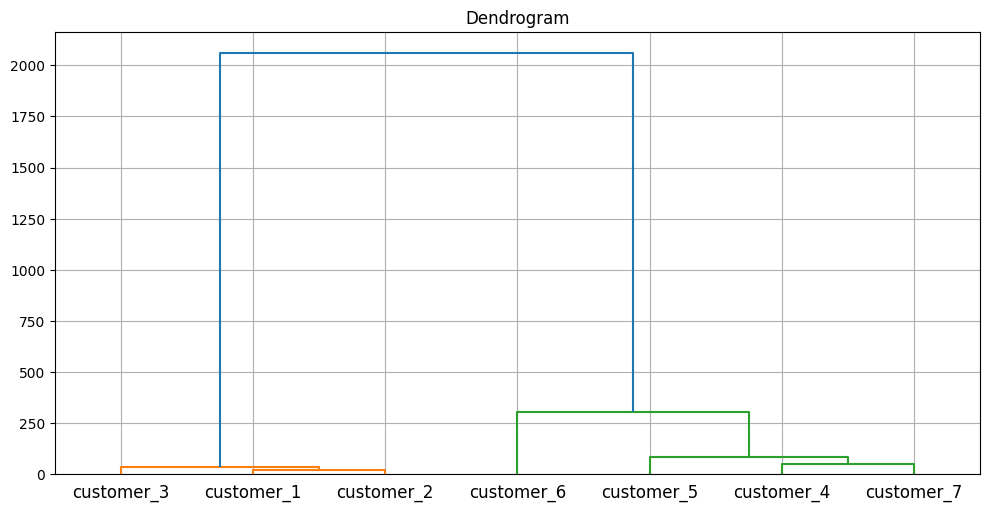

In [ ]:
plt.figure(figsize=(10,5))
dendrogram(linked,labels=df.index,distance_sort='ascending')
plt.grid(True)
plt.tight_layout()
plt.title('Dendrogram')
plt.show()

In [ ]:
data=
{
    "Monthly_Sales_Units":[500,450,400,300,280,200,150,100],
    "Return_Rate_Percent":[2,3,3,4,5,6,7,8]
}

**Exercise:** A store wants to group its product based on
* Monthly Sales Units
* and Return Rate percent
### Use K-means clustering do the grouping Do the following tasks
* import pandas,matplotlib and kMeans
* select two features Monthly_Sales_Units,Return_Rate_Percent
* Apply K-Means with K-3
* Add a new column Cluster
* Display final DataFrame
* Create scatter plot for clusters




In [ ]:
#import pandas,matplotlib and kMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
data={"Monthly_Sales_Units":[500,450,400,300,280,200,150,100],
    "Return_Rate_Percent":[2,3,3,4,5,6,7,8]
}

In [ ]:
df=pd.DataFrame(data)
df.head()

,Monthly_Sales_Units,Return_Rate_Percent
0,500,2
1,450,3
2,400,3
3,300,4
4,280,5


In [ ]:
#select two features Monthly_Sales_Units,Return_Rate_Percent
X=df[['Monthly_Sales_Units','Return_Rate_Percent']]

In [ ]:
#Apply K-Means with K-3
kmeans=KMeans(n_clusters=3,random_state=42)

In [ ]:
df['Cluster']=kmeans.fit_predict(X)  #Add a new column Cluster

In [ ]:
df  #Display final DataFrame

,Monthly_Sales_Units,Return_Rate_Percent,Cluster
0,500,2,2
1,450,3,2
2,400,3,0
3,300,4,0
4,280,5,0
5,200,6,1
6,150,7,1
7,100,8,1


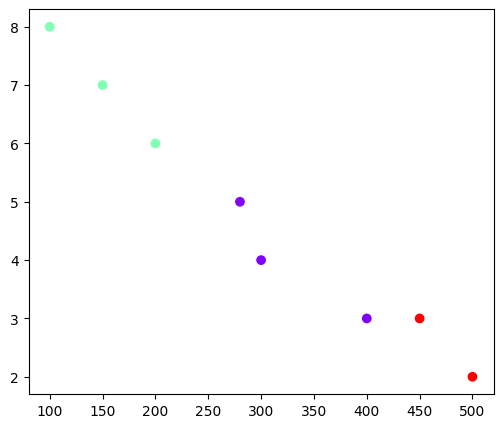

In [ ]:
#Create scatter plot for clusters
plt.figure(figsize=(6,5))
plt.scatter(df['Monthly_Sales_Units'],df['Return_Rate_Percent'],c=df['Cluster'],cmap='rainbow')
plt.show()

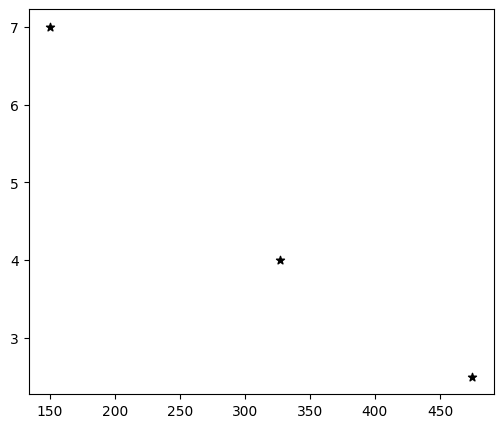

In [ ]:
centers=kmeans.cluster_centers_
plt.figure(figsize=(6,5))
plt.scatter(centers[:,0],centers[:,1],marker='*',c='black')
plt.show()

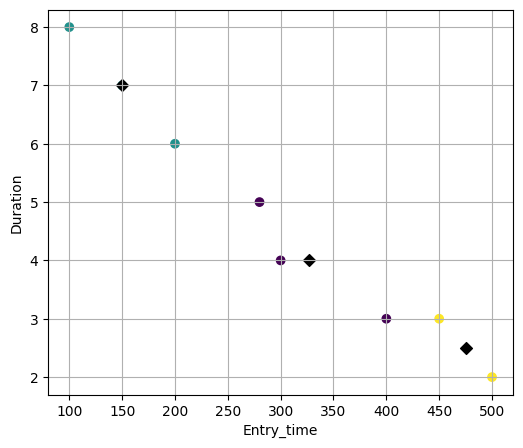

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df['Monthly_Sales_Units'],df['Return_Rate_Percent'],c=df['Cluster'])
plt.scatter(centers[:,0],centers[:,1],marker='D',c='black')
plt.xlabel('Entry_time')
plt.ylabel('Duration')
plt.grid()
plt.show()

Unsupervised Machine Learning Algorithms
1. K-means Clustering
2. Hierarchical Clustering
3. DBSCAN (Density Based Spatial Clustering of Application with Noise)

**DBSCAN** : is an unsupervised machine learning algorithm used for clustering when data has irregular shapes and outliers.
* does not require K
* finds cluster of any shape
* automatically detects noise
*  usefull in real world messy data

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [8]:
data={
    'Latitude':[11.0,12.97,12.98,12.99,13.00,13.01,19.07,19.08,19.09,28.61],
    'Longitude':[75.59,77.60,77.61,77.62,77.63,72.87,72.88,72.89,72.90,77.21]
}

In [10]:
df=pd.DataFrame(data)
df.head()

,Latitude,Longitude
0,11.00,75.59
1,12.97,77.60
2,12.98,77.61
3,12.99,77.62
4,13.00,77.63


In [11]:
df.shape

(10, 2)

In [12]:
X=df[['Latitude','Longitude']]

In [13]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [24]:
model_dbscan=DBSCAN(eps=0.75,min_samples=3)
 #DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
#Finds core samples of high density and expands clusters from them.
#Good for data which contains clusters of similar density.

In [25]:
df['Cluster']=model_dbscan.fit_predict(X_scaled)

In [26]:
print(df)

   Latitude  Longitude  Cluster
0     11.00      75.59       -1
1     12.97      77.60        0
2     12.98      77.61        0
3     12.99      77.62        0
4     13.00      77.63        0
5     13.01      72.87       -1
6     19.07      72.88        1
7     19.08      72.89        1
8     19.09      72.90        1
9     28.61      77.21       -1


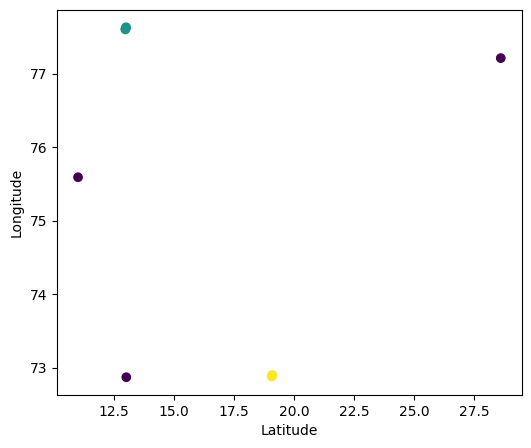

In [28]:
plt.figure(figsize=(6,5))
plt.scatter(df['Latitude'],df['Longitude'],c=df['Cluster'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()
#

#### A company monitors network traffic using Packets_Per_Second and Avg_PacketSize .
####  Find out normal traffic patterns and abnormal traffic pattern using DBSCAN
Data Set as follows:

In [42]:
data={'Packets_Per_Second':[105,120,130,125,140,500,520,510,50],
    'Avg_Packet_Size':[400,460,455,470,465,900,920,910,100]

}

In [43]:
df=pd.DataFrame(data)
df.head()

,Packets_Per_Second,Avg_Packet_Size
0,105,400
1,120,460
2,130,455
3,125,470
4,140,465


In [44]:
X=df[['Packets_Per_Second','Avg_Packet_Size']]

In [45]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


In [46]:
dbscan=DBSCAN(eps=0.9,min_samples=3)

In [47]:
df['Cluster']=dbscan.fit_predict(X_scaled)

In [48]:
print(df)

   Packets_Per_Second  Avg_Packet_Size  Cluster
0                 105              400        0
1                 120              460        0
2                 130              455        0
3                 125              470        0
4                 140              465        0
5                 500              900        1
6                 520              920        1
7                 510              910        1
8                  50              100       -1


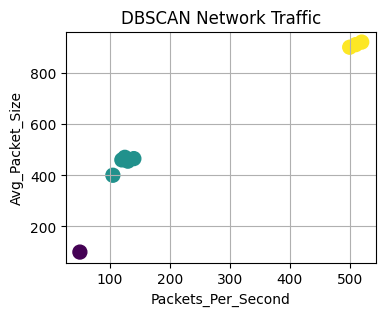

In [49]:
plt.figure(figsize=(4,3))
plt.scatter(df['Packets_Per_Second'],df['Avg_Packet_Size'],c=df['Cluster'],s=100)
plt.xlabel('Packets_Per_Second')
plt.ylabel('Avg_Packet_Size')
plt.title('DBSCAN Network Traffic')
plt.grid(True)
plt.show()